In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.spatial.distance import cdist
from sklearn import metrics
data = load_iris().data

In [15]:
#pick k centroids to begin with
def cluster_SS(k):
    centroids = data[random.sample(range(len(data)),k)]
    #loop through centroid-picking
    cnew = np.zeros(len(centroids))
    while not np.array_equal(cnew, centroids):
        #label points based on closest centroid
        cluster_label = np.argmin(cdist(data, centroids),axis = 1) 
        #use these points to calculate new centroid
        cnew = centroids.copy()
        for i in range(k):
            centroids[i] = data[np.argwhere(cluster_label == i)].mean(axis = 0)
    #SS depends on k
    return sum(sum((data - centroids[cluster_label]) ** 2))

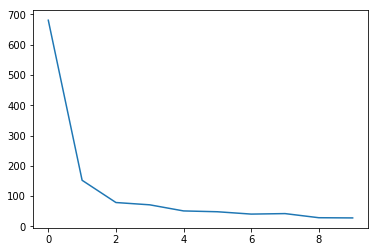

In [16]:
res = []
for k in range(1, 11):
    res.append(cluster_SS(k))
plt.plot(res)
plt.show()

In [20]:
centroids = data[random.sample(range(len(data)),3)]
#loop through centroid-picking
cnew = np.zeros(len(centroids))
while not np.array_equal(cnew, centroids):
    #label points based on closest centroid
    cluster_label = np.argmin(cdist(data, centroids),axis = 1) 
    #use these points to calculate new centroid
    cnew = centroids.copy()
    for i in range(3):
         centroids[i] = data[np.argwhere(cluster_label == i)].mean(axis = 0)
score = metrics.silhouette_score(data, cluster_label, metric='euclidean')
score

0.55096437465161252

In [12]:
from sklearn import cluster, datasets
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris)
k_means.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [21]:
cluster_label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

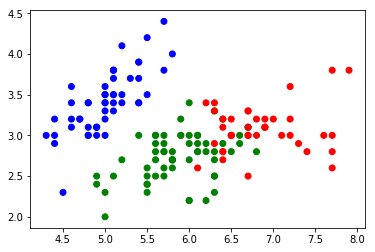

In [24]:
df = pd.DataFrame(dict(data0 = data[:,0] , data1 = data[:,1], cluster_label = cluster_label))

fig, ax = plt.subplots()

colors = {2:'red', 1:'blue', 0:'green'}

ax.scatter(df['data0'], df['data1'], c=df['cluster_label'].apply(lambda x: colors[x]))

plt.show()

In [25]:
k_means.labels_ == cluster_label

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,